In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [108]:
titanic = sns.load_dataset('titanic')

In [110]:
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [112]:
pd.crosstab(titanic.deck, titanic.pclass)

pclass,1,2,3
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4


In [49]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [50]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [52]:
titanic=titanic.drop(['who'], axis=1)

In [53]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [54]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [59]:
titanic.dropna(subset=['embarked', 'embark_town', 'age', 'deck', 'alive'], inplace=True)

In [60]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [61]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic['sex_encode']=encoder.fit_transform(titanic['sex'])
titanic['embarked_encode']=encoder.fit_transform(titanic['embarked'])
titanic['class_encode']=encoder.fit_transform(titanic['class'])
titanic['adult_male_encode']=encoder.fit_transform(titanic['adult_male'])
titanic['deck_encode']=encoder.fit_transform(titanic['deck'])
titanic['embark_town_encode']=encoder.fit_transform(titanic['embark_town'])
titanic['alone_encode']=encoder.fit_transform(titanic['alone'])

# ----------Feature selections---------------

In [72]:
X = titanic.drop(['survived','alive','sex','embarked','class','adult_male','deck','embark_town','alone'], axis = 1)
y = titanic['survived']

In [73]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 5, step = 1)
m=rfe_selector.fit(X, y)
X.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 5
Selected Features: [False  True False False  True  True False False  True  True False False]
Feature Ranking: [5 1 2 3 1 1 4 8 1 1 6 7]


In [79]:
X

,pclass,age,sibsp,parch,fare,sex_encode,embarked_encode,class_encode,adult_male_encode,deck_encode,embark_town_encode,alone_encode
1,1,38.0,1,0,71.2833,0,0,0,0,2,0,0
3,1,35.0,1,0,53.1000,0,2,0,0,2,2,0
6,1,54.0,0,0,51.8625,1,2,0,1,4,2,1
10,3,4.0,1,1,16.7000,0,2,2,0,6,2,0
11,1,58.0,0,0,26.5500,0,2,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,0,2,0,0,3,2,0
872,1,33.0,0,0,5.0000,1,2,0,1,1,2,1
879,1,56.0,0,1,83.1583,0,0,0,0,2,0,0
887,1,19.0,0,0,30.0000,0,2,0,0,1,2,1


In [82]:
x = X.drop(['age','sibsp','parch','embarked_encode','class_encode','alone_encode','embark_town_encode','alone_encode'], axis = 1)
y = titanic['survived']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(109, 5)
(109,)
(73, 5)
(73,)


# K Nearest Neighbour

------------- 1 -------------------
[[ 5 21]
 [ 7 40]]
------------- 2 -------------------
[[15 11]
 [20 27]]
------------- 3 -------------------
[[ 4 22]
 [ 6 41]]
------------- 4 -------------------
[[ 8 18]
 [17 30]]
------------- 5 -------------------
[[ 3 23]
 [ 4 43]]
------------- 6 -------------------
[[ 6 20]
 [ 6 41]]
------------- 7 -------------------
[[ 4 22]
 [ 4 43]]
------------- 8 -------------------
[[ 4 22]
 [ 5 42]]
------------- 9 -------------------
[[ 2 24]
 [ 3 44]]
------------- 10 -------------------
[[ 5 21]
 [ 4 43]]
------------- 11 -------------------
[[ 3 23]
 [ 3 44]]
------------- 12 -------------------
[[ 4 22]
 [ 4 43]]
------------- 13 -------------------
[[ 3 23]
 [ 4 43]]
------------- 14 -------------------
[[ 4 22]
 [ 4 43]]
------------- 15 -------------------
[[ 3 23]
 [ 3 44]]
------------- 16 -------------------
[[ 4 22]
 [ 4 43]]
------------- 17 -------------------
[[ 4 22]
 [ 4 43]]
------------- 18 -------------------
[[ 4 22]
 [ 4 43]]
-

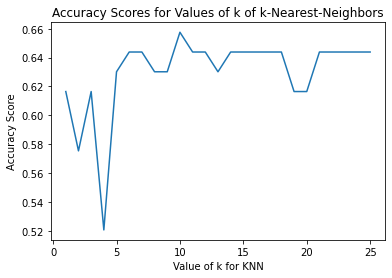

In [84]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# Decision Tree

In [89]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [94]:
rand_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=0),
                           {
                              'max_depth':np.arange(2,15)
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                   scoring='accuracy', verbose=1)

In [95]:
rand_search.best_params_

{'max_depth': 14}

In [101]:
#--------Executing the decision tree model-----------
tree = DecisionTreeClassifier(max_depth = 2, random_state = 1)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.863


In [102]:
x_train

,pclass,fare,sex_encode,adult_male_encode,deck_encode
429,3,8.0500,1,1,4
742,1,262.3750,0,0,1
659,1,113.2750,1,1,3
492,1,30.5000,1,1,2
835,1,83.1583,0,0,4
...,...,...,...,...,...
52,1,76.7292,0,0,3
366,1,75.2500,0,0,3
707,1,26.2875,1,1,4
583,1,40.1250,1,1,0


In [123]:
Leo=[3, 8.0500, 1,  1, 5]

In [124]:
leo=pd.DataFrame(Leo)

In [125]:
leo=leo.T

In [126]:
tree.predict(leo)

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)